In [1]:
!pip install geopy 
import pandas as pd
import geopy 
from geopy.geocoders import Nominatim
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

nom = Nominatim(user_agent="http")
nom.geocode("108 Banyon Tree Lane, Cary, NC 27513")

covid_nov = pd.read_csv('COVID Case Counts Nov21 to Oct22.csv')
covid_oct = pd.read_csv('COVID Case Counts Oct22.csv')
pm_nov = pd.read_csv('Device Corrected PM 2.5 Daily Averages Nov21 to Oct22.csv')
pm_oct = pd.read_csv('Device Corrected PM 2.5 Daily Averages Oct22.csv')

covid_nov=covid_nov[covid_nov['measure_name']==str('Case Count - Last 30 Days')]
covid_oct=covid_oct[covid_oct['measure_name']==str('Case Count - Last 30 Days')]


g1 = covid_nov.groupby('postal_code')
g2 = covid_oct.groupby('postal_code')

#covid_nov[['population','count']]
#

#covid_nov["Lakewood"] = covid_nov['postal_code']==int(44107)
#covid_nov["Cleveland_Lowest_Pop"] = covid_nov['postal_code']==int(44114)

#covid_nov["Lakewood"] = covid_nov["Lakewood"].map({True : 1, False: 0})
#covid_nov["Cleveland_Lowest_Pop"] = covid_nov["Cleveland_Lowest_Pop"].map({True : 1, False: 0})

#pm_nov["Coordinates"]=pm_nov['latitude'].apply(str)+", "+pm_nov['longitude'].apply(str)
#pm_nov

#def get_zipcode(df, geolocator, latitude_field, longitude_field):
    #location = geolocator.reverse((df[latitude_field], df[longitude_field]))
    #return location.raw['address']['postcode']

#dir(geopy)

#geolocator = geopy.Nominatim(user_agent='my-application')

#df = pd.DataFrame({'Lat': pm_nov['latitude'], 'Lon': pm_nov['longitude']})

#zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Lat', lon_field='Lon')

#print(covid_nov)

#poll_nov = pd.merge(lakewood_nov, pm_nov, on="time")
## need to find out how to convert lat and long into zip codes
## install geopy then use this to give you a zip code for pm data then merge data tables

In [2]:
pm_nov.rename(columns={'PM 2.5': 'PM2'}, inplace=True)
print(pm_nov)
pm_oct.rename(columns={'PM 2.5': 'PM2'}, inplace=True)
print(pm_oct)
pm_nov["postal_code"] = pm_nov.apply(lambda _: None, axis=1)
pm_oct["postal_code"] = pm_oct.apply(lambda _: None, axis=1)

#pm_nov['postal_code'] = [list() for x in range(len(pm_nov.Series))]
#pm_oct['postal_code'] = [list() for x in range(len(pm_nov.Series))]


          deviceid                 time   PM2  latitude  longitude
0     40F5205CBAD0  2022-10-31 20:00:00  6.98   41.5049   -81.6429
1     40F5205CBA88  2022-10-31 20:00:00  4.54   41.4804   -81.6388
2     40F5205CBA84  2022-10-31 20:00:00  7.38   41.5142   -81.6239
3     40F5205CBA78  2022-10-31 20:00:00  7.01   41.5048   -81.6140
4     40F5205CBA6C  2022-10-31 20:00:00  1.57   41.4977   -81.6674
...            ...                  ...   ...       ...        ...
9836  40F5205CB520  2021-10-31 20:00:00  1.60   41.4333   -81.3891
9837  40F5205CB4F0  2021-10-31 20:00:00  1.97   41.4436   -81.8565
9838  40F5205C83D0  2021-10-31 20:00:00  1.60   41.4031   -81.6983
9839  40F5205C83C8  2021-10-31 20:00:00  1.64   41.4838   -81.9278
9840  40F5205B3838  2021-10-31 20:00:00  2.10   41.4922   -81.6787

[9841 rows x 5 columns]
         deviceid                 time   PM2  latitude  longitude
0    40F5205CBAD0  2022-10-31 20:00:00  6.98   41.5049   -81.6429
1    40F5205CBA88  2022-10-31 20:00:00 

In [3]:
for postal_code, postal_code_covid_nov in g1:
    print(postal_code)
    print(postal_code_covid_nov)
    
for postal_code, postal_code_covid_oct in g2:
    print(postal_code)
    print(postal_code_covid_oct)

44017
                    measure_name                 date  postal_code  \
79     Case Count - Last 30 Days  2022-10-25 17:52:19        44017   
408    Case Count - Last 30 Days  2022-10-18 17:52:19        44017   
810    Case Count - Last 30 Days  2022-10-18 10:08:08        44017   
1054   Case Count - Last 30 Days  2022-10-18 09:52:08        44017   
1312   Case Count - Last 30 Days  2022-10-11 17:52:19        44017   
1682   Case Count - Last 30 Days  2022-10-04 17:52:18        44017   
2008   Case Count - Last 30 Days  2022-09-27 17:52:19        44017   
2288   Case Count - Last 30 Days  2022-09-20 17:52:18        44017   
2534   Case Count - Last 30 Days  2022-09-13 17:52:18        44017   
2912   Case Count - Last 30 Days  2022-09-06 17:52:19        44017   
3212   Case Count - Last 30 Days  2022-08-30 17:52:18        44017   
3630   Case Count - Last 30 Days  2022-08-23 17:52:18        44017   
3796   Case Count - Last 30 Days  2022-08-16 17:52:18        44017   
4240   Case Co

In [4]:
print(g1)

In [5]:
g1.describe()

population                                                    \
                 count     mean  std      min      25%      50%      75%   
postal_code                                                                
44017             54.0  18903.0  0.0  18903.0  18903.0  18903.0  18903.0   
44022             54.0  16604.0  0.0  16604.0  16604.0  16604.0  16604.0   
44040             54.0   2903.0  0.0   2903.0   2903.0   2903.0   2903.0   
44070             54.0  31847.0  0.0  31847.0  31847.0  31847.0  31847.0   
44101             54.0    610.0  0.0    610.0    610.0    610.0    610.0   
44102             54.0  45514.0  0.0  45514.0  45514.0  45514.0  45514.0   
44103             54.0  16519.0  0.0  16519.0  16519.0  16519.0  16519.0   
44104             54.0  19640.0  0.0  19640.0  19640.0  19640.0  19640.0   
44105             54.0  37211.0  0.0  37211.0  37211.0  37211.0  37211.0   
44106             54.0  25752.0  0.0  25752.0  25752.0  25752.0  25752.0   
44107             54.0  50666.0  0.0  50666.0  50666.0  50666.0  50666.0   
44108             54.0  21939.0  0.0  21939.0  21939.0  21939.0  21939.0   
44109             54.0  40246.0  0.0  40246.0  40246.0  40246.0  40246.0   
44110             54.0  19116.0  0.0  19116.0  19116.0  19116.0  19116.0   
44111             54.0  42821.0  0.0  42821.0  42821.0  42821.0  42821.0   
44112             54.0  21909.0  0.0  21909.0  21909.0  21909.0  21909.0   
44113             54.0  20358.0  0.0  20358.0  20358.0  20358.0  20358.0   
44114             54.0   6567.0  0.0   6567.0   6567.0   6567.0   6567.0   
44115             54.0   8284.0  0.0   8284.0   8284.0   8284.0   8284.0   
44116             54.0  20338.0  0.0  20338.0  20338.0  20338.0  20338.0   
44117             54.0   9611.0  0.0   9611.0   9611.0   9611.0   9611.0   
44118             54.0  38833.0  0.0  38833.0  38833.0  38833.0  38833.0   
44119             54.0  13108.0  0.0  13108.0  13108.0  13108.0  13108.0   
44120             54.0  34276.0  0.0  34276.0  34276.0  34276.0  34276.0   
44121             54.0  33211.0  0.0  33211.0  33211.0  33211.0  33211.0   
44122             54.0  33342.0  0.0  33342.0  33342.0  33342.0  33342.0   
44123             54.0  16515.0  0.0  16515.0  16515.0  16515.0  16515.0   
44124             54.0  37737.0  0.0  37737.0  37737.0  37737.0  37737.0   
44125             54.0  27939.0  0.0  27939.0  27939.0  27939.0  27939.0   
44126             54.0  16372.0  0.0  16372.0  16372.0  16372.0  16372.0   
44127             54.0   4375.0  0.0   4375.0   4375.0   4375.0   4375.0   
44128             54.0  28790.0  0.0  28790.0  28790.0  28790.0  28790.0   
44129             54.0  28276.0  0.0  28276.0  28276.0  28276.0  28276.0   
44130             54.0  49787.0  0.0  49787.0  49787.0  49787.0  49787.0   
44131             54.0  20532.0  0.0  20532.0  20532.0  20532.0  20532.0   
44132             54.0  14805.0  0.0  14805.0  14805.0  14805.0  14805.0   
44133             54.0  30225.0  0.0  30225.0  30225.0  30225.0  30225.0   
44134             54.0  37533.0  0.0  37533.0  37533.0  37533.0  37533.0   
44135             54.0  27640.0  0.0  27640.0  27640.0  27640.0  27640.0   
44136             54.0  25776.0  0.0  25776.0  25776.0  25776.0  25776.0   
44137             54.0  22657.0  0.0  22657.0  22657.0  22657.0  22657.0   
44138             54.0  22378.0  0.0  22378.0  22378.0  22378.0  22378.0   
44139             54.0  24212.0  0.0  24212.0  24212.0  24212.0  24212.0   
44140             54.0  15391.0  0.0  15391.0  15391.0  15391.0  15391.0   
44141             54.0  13830.0  0.0  13830.0  13830.0  13830.0  13830.0   
44142             54.0  18674.0  0.0  18674.0  18674.0  18674.0  18674.0   
44143             54.0  24241.0  0.0  24241.0  24241.0  24241.0  24241.0   
44144             54.0  21697.0  0.0  21697.0  21697.0  21697.0  21697.0   
44145             54.0  32378.0  0.0  32378.0  32378.0  32378.0  32378.0   
44146             54.0  29223.0  0.0  29223.0  29223.0  2922

In [6]:
g1.mean()

,population,count
postal_code,,
44017,18903.0,189.111111
44022,16604.0,142.166667
44040,2903.0,29.537037
44070,31847.0,303.444444
44101,610.0,0.981481
44102,45514.0,403.481481
44103,16519.0,141.888889
44104,19640.0,169.722222
44105,37211.0,316.166667


             population       count
postal_code                        
44017           18903.0  189.111111
44022           16604.0  142.166667
44040            2903.0   29.537037
44070           31847.0  303.444444
44101             610.0    0.981481
44102           45514.0  403.481481
44103           16519.0  141.888889
44104           19640.0  169.722222
44105           37211.0  316.166667
44106           25752.0  331.425926
44107           50666.0  514.814815
44108           21939.0  186.888889
44109           40246.0  393.388889
44110           19116.0  156.240741
44111           42821.0  393.185185
44112           21909.0  177.388889
44113           20358.0  202.370370
44114            6567.0   84.925926
44115            8284.0  118.685185
44116           20338.0  217.666667
44117            9611.0  112.518519
44118           38833.0  395.925926
44119           13108.0  129.388889
44120           34276.0  345.259259
44121           33211.0  360.277778
44122           33342.0  414

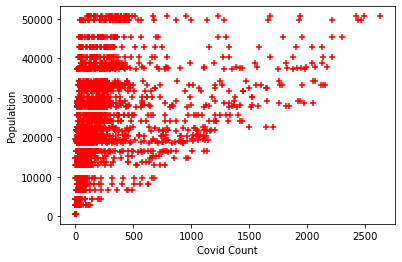

In [7]:
df = g1.mean()
print(df)
x = np.array([covid_nov['count']])
y = np.array([covid_nov['population']])
plt.xlabel('Covid Count')
plt.ylabel('Population')
plt.scatter(x=x,y=y, color = 'red', marker='+')

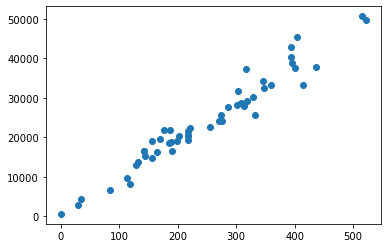

In [8]:
x = np.array([df['count']])
y = np.array([df['population']])
plt.scatter(x=x, y=y)

In [9]:
df2 = df[['count', 'population']].copy()
print(df2)

                  count  population
postal_code                        
44017        189.111111     18903.0
44022        142.166667     16604.0
44040         29.537037      2903.0
44070        303.444444     31847.0
44101          0.981481       610.0
44102        403.481481     45514.0
44103        141.888889     16519.0
44104        169.722222     19640.0
44105        316.166667     37211.0
44106        331.425926     25752.0
44107        514.814815     50666.0
44108        186.888889     21939.0
44109        393.388889     40246.0
44110        156.240741     19116.0
44111        393.185185     42821.0
44112        177.388889     21909.0
44113        202.370370     20358.0
44114         84.925926      6567.0
44115        118.685185      8284.0
44116        217.666667     20338.0
44117        112.518519      9611.0
44118        395.925926     38833.0
44119        129.388889     13108.0
44120        345.259259     34276.0
44121        360.277778     33211.0
44122        414.907407     

In [14]:
reg = linear_model.LinearRegression()
reg.fit(df2[['count']], df2.population)

LinearRegression()

In [19]:
reg.predict([[550]])

array([118309.57785172])

In [20]:
reg.coef_

array([210.04958814])

In [21]:
reg.intercept_

2782.3043745055

             population       count
postal_code                        
44017           18903.0  189.111111
44022           16604.0  142.166667
44040            2903.0   29.537037
44070           31847.0  303.444444
44101             610.0    0.981481
44102           45514.0  403.481481
44103           16519.0  141.888889
44104           19640.0  169.722222
44105           37211.0  316.166667
44106           25752.0  331.425926
44107           50666.0  514.814815
44108           21939.0  186.888889
44109           40246.0  393.388889
44110           19116.0  156.240741
44111           42821.0  393.185185
44112           21909.0  177.388889
44113           20358.0  202.370370
44114            6567.0   84.925926
44115            8284.0  118.685185
44116           20338.0  217.666667
44117            9611.0  112.518519
44118           38833.0  395.925926
44119           13108.0  129.388889
44120           34276.0  345.259259
44121           33211.0  360.277778
44122           33342.0  414

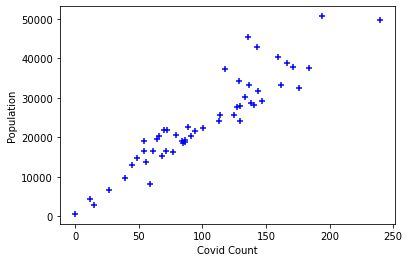

In [17]:
df3 = g2.mean()
print(df)
x = np.array([df3['count']])
y = np.array([df3['population']])
plt.xlabel('Covid Count')
plt.ylabel('Population')
plt.scatter(x=x,y=y, color = 'blue', marker='+')

In [18]:
df4 = df3[['count', 'population']].copy()
reg = linear_model.LinearRegression()
reg.fit(df4[['count']], df4.population)
reg.predict([[550]])

array([118309.57785172])

In [ ]:
import geopy 
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
nom = Nominatim(user_agent="http")
def get_zip_code(x, attempt = 1, max_attempts = 5 ):
    location = nom.reverse("{}, {}".format(x['latitude'],x['longitude'], timeout = None))
    try:
        return location.raw['address']['postcode']
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return get_zip_code(x, attempt = attempt + 1)
        raise 
        
    
pm_nov['postal_code'] = pm_nov().apply(lambda x: get_zip_code(x), axis = 1)
g3 = pm_nov()
g4 = g3.groupby('postal_code')
for postal_code, postal_code_g3 in g4:
    print(postal_code)
    print(postal_code_g3)
    
#%matplotlib inline
#x = np.array([covid_nov['count']])
#y = np.array([covid_nov['population']])
#plt.xlabel('Covid Count')
#plt.ylabel('Population')
#plt.scatter(x=x,y=y, color = 'red', marker='+')

In [22]:

pm_nov['latitude'] = pm_nov['latitude'].round(1)
pm_nov['longitude'] = pm_nov['longitude'].round(1)
pm_oct['latitude'] = pm_oct['latitude'].round(1)
pm_oct['longitude'] = pm_oct['longitude'].round(1)

g1 = pm_nov.groupby('latitude')
g2 = pm_nov.groupby('latitude')
grouped_multiple = pm_nov.groupby(['latitude', 'longitude']).agg({'PM2': ['mean', 'min', 'max']})
grouped_multiples = pm_oct.groupby(['latitude', 'longitude']).agg({'PM2': ['mean', 'min', 'max']})
print(grouped_multiple)
print(grouped_multiples)



                          PM2               
                         mean    min     max
latitude longitude                          
-1.0     -1.0        9.530000   9.53    9.53
 41.3    -81.8       7.058547   0.00   24.00
         -81.6       5.833553   0.00   17.80
 41.4    -82.0      26.700000  26.70   26.70
         -81.9       6.265519   0.00   27.60
         -81.8       5.756167  -1.00   31.50
         -81.7       5.959791   0.00   22.50
         -81.6       6.246757   0.00   20.00
         -81.5       4.347398   0.00   18.60
         -81.4       5.185453   0.00   17.10
 41.5    -82.2       6.490000   6.49    6.49
         -81.9       4.989676   0.00   19.90
         -81.8       2.400000   2.40    2.40
         -81.7       5.897389  -1.00  121.00
         -81.6       5.707153   0.00   95.90
         -81.5       5.867013   0.00   19.90
         -81.4       4.143000   1.59   10.00
 41.6    -81.7       7.240000   2.78   11.70
         -81.6       4.791529   0.00   20.30
          

In [23]:
data = {'latitude': [41.4 , 41.4, 41.4, 41.4, 41.4, 41.5, 41.5, 41.5, 41.5, 41.6 ],
        'longitude': [-81.9, -81.8, -81.7, -81.5, -81.4, -81.9, -81.7, -81.6, -81.5, -81.6],
        'mean': [3.6292, 5.070714, 4.131833, 3.488605, 2.809474, 4.785000, 3.309467, 4.232195, 3.449130, 3.766875],
       'postal_code': [44138, 44142, 44134, 44146, 44022, 44140, 44113, 44106, 44122, 44132]}

data2 = {'latitude': [41.3, 41.3, 41.4, 41.4, 41.4, 41.4, 41.4, 41.4, 41.4, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.5, 41.6, 41.6],
         'longitude': [-81.8, -81.6, -82.0, -81.9, -81.8, -81.7, -81.6, -81.5, -81.4, -82.2, -81.9, -81.8, -81.7, -81.6, -81.5, -81.4, -81.7, -81.6],
         'mean': [7.058547, 5.833553, 26.7000,  6.265519, 5.756167, 5.959791, 6.246757, 4.347398, 5.185453, 6.490000, 4.989676, 2.400000, 5.897389, 5.707153, 5.867013, 4.143000, 7.240000, 4.791529],
        'postal_code': [44096, 44141, 44039, 44138, 44142, 44134, 44125, 44146, 44022, 44052, 44140, 44107, 44113, 44106, 44122, 44022, 44108, 44132]}
# Create DataFrame
pdf = pd.DataFrame(data)
pdf2 = pd.DataFrame(data2)

 
# Print the output.
print(pdf)
print(pdf2)

   latitude  longitude      mean  postal_code
0      41.4      -81.9  3.629200        44138
1      41.4      -81.8  5.070714        44142
2      41.4      -81.7  4.131833        44134
3      41.4      -81.5  3.488605        44146
4      41.4      -81.4  2.809474        44022
5      41.5      -81.9  4.785000        44140
6      41.5      -81.7  3.309467        44113
7      41.5      -81.6  4.232195        44106
8      41.5      -81.5  3.449130        44122
9      41.6      -81.6  3.766875        44132
    latitude  longitude       mean  postal_code
0       41.3      -81.8   7.058547        44096
1       41.3      -81.6   5.833553        44141
2       41.4      -82.0  26.700000        44039
3       41.4      -81.9   6.265519        44138
4       41.4      -81.8   5.756167        44142
5       41.4      -81.7   5.959791        44134
6       41.4      -81.6   6.246757        44125
7       41.4      -81.5   4.347398        44146
8       41.4      -81.4   5.185453        44022
9       41.5  

In [24]:
reg = linear_model.LinearRegression()
reg.fit(pdf2[['mean']], pdf2.postal_code)
reg.predict([[26]])

array([44047.42844692])

In [25]:
reg.fit(pdf[['mean']], pdf.postal_code)
reg.predict([[26]])

array([44812.04437463])

In [26]:
reg.coef_

array([31.29047916])

In [27]:
reg.intercept_

43998.491916355095

In [28]:
pdf = pdf.rename(columns={'mean': 'PM 2',})

In [29]:
pdf2 = pdf2.rename(columns={'mean': 'PM 2',})

In [30]:
result = pd.merge(df2, pdf, on="postal_code")
print(result)

   postal_code       count  population  latitude  longitude      PM 2
0        44022  142.166667     16604.0      41.4      -81.4  2.809474
1        44106  331.425926     25752.0      41.5      -81.6  4.232195
2        44113  202.370370     20358.0      41.5      -81.7  3.309467
3        44122  414.907407     33342.0      41.5      -81.5  3.449130
4        44132  156.518519     14805.0      41.6      -81.6  3.766875
5        44134  401.000000     37533.0      41.4      -81.7  4.131833
6        44138  220.166667     22378.0      41.4      -81.9  3.629200
7        44140  144.037037     15391.0      41.5      -81.9  4.785000
8        44142  185.277778     18674.0      41.4      -81.8  5.070714
9        44146  317.796296     29223.0      41.4      -81.5  3.488605


In [31]:
result2 = pd.merge(df4, pdf2, on="postal_code")
print(result2)

    postal_code       count  population  latitude  longitude      PM 2
0         44022   61.000000     16604.0      41.4      -81.4  5.185453
1         44022   61.000000     16604.0      41.5      -81.4  4.143000
2         44106  113.833333     25752.0      41.5      -81.6  5.707153
3         44107  194.166667     50666.0      41.5      -81.8  2.400000
4         44108   72.000000     21939.0      41.6      -81.7  7.240000
5         44113   65.833333     20358.0      41.5      -81.7  5.897389
6         44122  161.500000     33342.0      41.5      -81.5  5.867013
7         44125  129.166667     27939.0      41.4      -81.6  6.246757
8         44132   48.833333     14805.0      41.6      -81.6  4.791529
9         44134  183.833333     37533.0      41.4      -81.7  5.959791
10        44138  100.666667     22378.0      41.4      -81.9  6.265519
11        44140   68.000000     15391.0      41.5      -81.9  4.989676
12        44141   55.833333     13830.0      41.3      -81.6  5.833553
13    

In [32]:
reg.fit(result[['count','PM 2']],result.postal_code)
reg.predict([[61,5]])

array([44136.75290134])

In [33]:
reg.coef_

array([ 0.10147592, 32.30263147])

In [34]:
reg.intercept_

43969.04971312385

# Everything Below is basically junk code

In [ ]:
import geopy 
from geopy.geocoders import Nominatim
from time import sleep
nom = Nominatim(user_agent="http")


def get_zip_code(x):
    location = nom.reverse("{}, {}".format(x['latitude'],x['longitude']))
    return location.raw['address']['postcode']


df['postal_code'] = df.head().apply(lambda x: get_zip_code(x), axis = 1)
print(df.head())



In [ ]:
pm_nov['latitude'] = pm_nov['latitude'].round(3)
print(pm_nov)

In [ ]:
data1 = {'Postal_Code': [44017, 44022, 44040, 44070, 44101, 44102, 44103, 44104, 44105, 44106, 44107, 44108, 44109, 44110, 44111, 44112, 44113, 44114, 44115, 44116, 44117, 44118, 44119, 44120, 44121, 44122, 44123, 44124, 44125, 44126, 44127, 44128, 44129, 44130, 44131, 44132, 44133, 44134, 44135, 44136, 44137, 44138, 44139, 44140, 44141, 44142, 44143, 44145, 44146, 44147, 44149],
'Count': [189.111111, 142.166667, 29.537037, 303.444444, 0.981481, 403.481481, 141.888889, 169.722222, 316.166667, 331.425926, 514.814815, 186.888889, 393.388889, 156.240741, 393.185185, 177.388889, 202.370370, 84.925926, 118.685185, 217.666667, 112.518519, 395.925926, 129.388889, 345.259259, 360.277778, 414.907407, 190.574074, 435.537037, 312.425926, 165.148148, 34.185185, 308, 300.666667, 521.222222, 217.537037, 156.518519, 329.203704, 401, 285.574074, 274.481481, 255.333333, 220.166667, 270.296296, 144.037037, 132.500000, 185.277778, 275.962963, 217.981481, 347.833333, 317.796296, 216.888889, 199.425926]}

df2 = pd.DataFrame(data1, columns=['Postal_Code', 'Count'])


#df = pd.DataFrame(Postal_Code)

#data = {'Postal Code': [44017, 44022, 44040, 44070, 44101, 44102, 44103, 44104, 44105, 44106, 44107, 44108, 44109, 44110, 44111, 44112, 44113, 44114, 44115, 44116, 44117, 44118, 44119, 44120, 44121, 44122, 44123, 44124, 44125, 44126, 44127, 44128, 44129, 44130, 44131, 44132, 44133, 44134, 44135, 44136, 44137, 44138, 44139, 44140, 44141, 44142, 44143, 44145, 44146, 44147, 44149],}

#datadf = pd.DataFrame(data)
#datadf

#def tgrp(df):
    #df = df.drop('Postal_Code', axis=1)
    #return df.reset_index(drop=True).T

#df2.groupby('Name').apply(tgrp).unstack()

df2


In [ ]:
import geopy 
from geopy.geocoders import Nominatim
from time import sleep
nom = Nominatim(user_agent="http")
#geopy.geocoders.options.default_timeout = none
#nom.geocode("108 Banyon Tree Lane, Cary, NC 27513")
#pm_nov["Coordinates"]=pm_nov["latitude"].astype(str)+", "+pm_nov["longitude"].astype(str)
#zip_code=nom.reverse(pm_nov["Coordinates"])
#pm_nov["Zip Codes"]=pm_nov["Coordinates"].apply(nom.reverse)



def get_zip_code(x):
    ziip = f"{x['latitude']}, {x['longitude']}"
    location = nom.reverse(ziip, exactly_one=True, language='en')
    sleep(1)
    if not location:
        print('Failed with Postal Code: ', ziip)
        x['postal_code'] = None
        return x
    address = location.raw['address']
    postal_code = address.get('postcode', '')
    x['postal_code'] = postal_code
    return x
   # return location.raw['address']['postcode']

pm_nov = pm_nov.apply(get_zip_code, axis=1)

pm_nov['postal_code'] = pm_nov.head(9840).apply(lambda x: get_zip_code(x), axis = 1)
print(pm_nov)

#november = pd.concat([covid_nov, pm_nov.head()])
#november


pm_oct['postal_code'] = pm_oct.head(9840).apply(lambda x: get_zip_code(x), axis = 1)
pm_oct
#october = pd.concat([covid_oct, pm_oct.head()])
#october

#zip_code

In [ ]:
dir(geopy)

In [ ]:
dir(uszipcode)

In [ ]:
print(pm_nov)

In [ ]:
import geopy 
from geopy.geocoders import Nominatim
nom = Nominatim(user_agent="http")
#nom.geocode("108 Banyon Tree Lane, Cary, NC 27513")
#pm_nov["Coordinates"]=pm_nov["latitude"].astype(str)+", "+pm_nov["longitude"].astype(str)
#zip_code=nom.reverse(pm_nov["Coordinates"])
#pm_nov["Zip Codes"]=pm_nov["Coordinates"].apply(nom.reverse)

def get_zip_code(x):
    location = nom.reverse("{}, {}".format(x['latitude'],x['longitude']))
    return location.raw['address']['postcode']
pm_nov['postal_code'] = pm_nov.head(9840).apply(lambda x: get_zip_code(x), axis = 1)
print(pm_nov.head(9840))

november = pd.concat([covid_nov, pm_nov.head(9840)])
november


pm_oct['postal_code'] = pm_oct.head(9840).apply(lambda x: get_zip_code(x), axis = 1)
print(pm_oct.head(9840))
october = pd.concat([covid_oct, pm_oct.head(9840)])
october

In [ ]:
# Import packages
!pip install uszipcode
!pip install SQLAlchemy==1.3.23
import uszipcode
from uszipcode import SearchEngine
from uszipcode import ComprehensiveZipcode
search = SearchEngine()
import numpy as np


#Now to the real deal: the search function. This function can be #manually adapted to your needs (e.g., getting the full address instead of just ZIP codes)

#define zipcode search function
def get_zipcode(x):
    result = search.by_coordinates(lat = lat, lng = lon, returns = 1)
    return result[0].zipcode

#load columns from dataframe
lat = pm_nov['latitude']
lon = pm_nov['longitude']

#add new column with generated zip-code
pm_nov['postal_code'] = pm_nov.apply(lambda x: get_zipcode(x), axis=1)

In [ ]:
import uszipcode
search = uszipcode.SearchEngine()

def f(x):
    result = search.by_coordinates(x['latitude'], x['longitude'], radius=10, returns=1)
    if result:
        return result[0].to_dict()
    else:
        return {}

pm_nov = pm_nov.apply(f(pm_nov), axis=1)
print (pm_nov)

In [ ]:
import statistics
import numpy as np
median_countnov = statistics.median(covid_nov['count'])
median_countoct = statistics.median(covid_oct['count'])
median_polloct = statistics.median(pm_oct['PM2'])
median_pollnov = statistics.median(pm_nov['PM2'])
print(median_countnov)
print(median_countoct)
print(median_polloct)
print(median_pollnov)


In [ ]:
mreg = linear_model.LinearRegression()
mreg.fit()

In [ ]:
cn_array = np.arange(covid_nov['count'])
print(cn_array)